# Pandas
### Alberto Torres Barrán

Pandas es una librería de código abierto que implementa estructuras y herramientas para el análisis de datos en Python. Más concretamente, las dos estructuras principales son:
  * `Series`, para representar un vector de datos con un índice (no necesariamente numérico) asociado
  * `DataFrame`, para representar datos tabulares, donde las columnas pueden ser de distinto tipo y tienen asociado otro índice

Referencia: http://pandas.pydata.org/    
Tutoriales: https://pandas.pydata.org/pandas-docs/stable/tutorials.html    
Documentación: https://pandas.pydata.org/pandas-docs/stable/index.html

In [1]:
import numpy as np
import pandas as pd

# las Series contienen un array de Numpy con un índice asociado
serie = pd.Series([1, 2, 3, 4, 5])
serie

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [2]:
# podemos acceder al array de Numpy que contiene los datos
serie.values

array([1, 2, 3, 4, 5])

In [3]:
# y al indice
serie.index

RangeIndex(start=0, stop=5, step=1)

In [4]:
# podemos acceder a ciertos valores de la Serie como si fuera un array de Numpy de 1D
serie[2:4]

2    3
3    4
dtype: int64

In [5]:
# la gran ventaja es que el indice no tiene por que ser numerico, pueden ser fechas...
rango = pd.date_range('1/7/2017', periods=24, freq='H')
ts = pd.Series(np.random.randn(len(rango)), index=rango)
ts

2017-01-07 00:00:00    0.719602
2017-01-07 01:00:00   -1.042460
2017-01-07 02:00:00   -0.231249
2017-01-07 03:00:00    0.513782
2017-01-07 04:00:00    0.321378
2017-01-07 05:00:00   -1.766030
2017-01-07 06:00:00    0.166208
2017-01-07 07:00:00    0.192987
2017-01-07 08:00:00    1.197907
2017-01-07 09:00:00   -1.151725
2017-01-07 10:00:00   -0.410174
2017-01-07 11:00:00    0.666251
2017-01-07 12:00:00   -0.991001
2017-01-07 13:00:00   -0.815609
2017-01-07 14:00:00    0.324110
2017-01-07 15:00:00   -2.657240
2017-01-07 16:00:00    0.705779
2017-01-07 17:00:00   -1.933207
2017-01-07 18:00:00   -0.997221
2017-01-07 19:00:00   -0.257837
2017-01-07 20:00:00   -1.621948
2017-01-07 21:00:00    0.816338
2017-01-07 22:00:00   -1.169999
2017-01-07 23:00:00   -0.102880
Freq: H, dtype: float64

In [6]:
# o cadenas de caracteres
notas = pd.Series([4.5, 9.8, 6.5], index=['Alberto', 'Maria', 'Jose'])
notas

Alberto    4.5
Maria      9.8
Jose       6.5
dtype: float64

In [7]:
notas['Maria']

9.8

In [8]:
# en este caso, es similar a un diccionario pero sus elementos estan ordenados
notas['Alberto':'Maria']

Alberto    4.5
Maria      9.8
dtype: float64

Los `DataFrames` almacenan datos tabulares y se pueden interpretar de dos formas:
 * Como un array de Numpy en 2D donde cada columna puede ser de un tipo distinto y tiene un nombre
 * Como un conjunto de `Series` que comparten un índice

In [9]:
import pandas as pd
fechas = pd.date_range('20170101', periods=6)
fechas

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
# se puede crear un DataFrame a partir de un array de Numpy, indicando el indice a usar (fechas en este caso)
# y el nombre de las columnas
# ['A', 'B', 'C', 'D']
df = pd.DataFrame(np.random.randn(6,4), index=fechas, columns=list('ABCD'))
df

,A,B,C,D
2017-01-01,1.469045,0.105841,0.821768,0.642901
2017-01-02,-0.244589,-1.387722,1.100559,-0.147288
2017-01-03,-1.510829,0.356324,-0.286592,-0.341157
2017-01-04,-1.209894,0.886165,-0.303264,0.248125
2017-01-05,-0.796359,0.215604,-0.642767,0.363467
2017-01-06,-0.838825,0.043444,0.097556,-0.363883


In [11]:
# tambien se puede crear un DataFrame a partir de un diccionario con objetos que se pueden convertir en Series
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1, index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [12]:
# tipos de cada una de las columnas
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [13]:
# nombres de las columnas
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [14]:
# podemos acceder a cada una de las columnas por su nombre, devolviendo una Serie
df['A']

2017-01-01    1.469045
2017-01-02   -0.244589
2017-01-03   -1.510829
2017-01-04   -1.209894
2017-01-05   -0.796359
2017-01-06   -0.838825
Freq: D, Name: A, dtype: float64

In [15]:
# tambien a varias, obteniendo otro DataFrame
df[['A', 'D']]

,A,D
2017-01-01,1.469045,0.642901
2017-01-02,-0.244589,-0.147288
2017-01-03,-1.510829,-0.341157
2017-01-04,-1.209894,0.248125
2017-01-05,-0.796359,0.363467
2017-01-06,-0.838825,-0.363883


In [16]:
# tambien podemos acceder a un subconjunto de las filas
df[1:4]

,A,B,C,D
2017-01-02,-0.244589,-1.387722,1.100559,-0.147288
2017-01-03,-1.510829,0.356324,-0.286592,-0.341157
2017-01-04,-1.209894,0.886165,-0.303264,0.248125


In [17]:
# y combinar ambas cosas
df['A'][1:4]

2017-01-02   -0.244589
2017-01-03   -1.510829
2017-01-04   -1.209894
Freq: D, Name: A, dtype: float64

Pandas también tiene otros métodos de acceso más avanzados:
  * *Indexing and Selecting Data* http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing    
  * *Multiindexing/Advanced indexing* http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced

##### Selección por etiquetas

Método `.loc`. Algunos ejemplos:

In [18]:
# en este caso, los puntos finales SI se incluyen
df.loc['20170102':'20170104', ['A','B']]

,A,B
2017-01-02,-0.244589,-1.387722
2017-01-03,-1.510829,0.356324
2017-01-04,-1.209894,0.886165


In [19]:
df.loc['20170103']

A   -1.510829
B    0.356324
C   -0.286592
D   -0.341157
Name: 2017-01-03 00:00:00, dtype: float64

###### Selección por posición

Método `.iloc`. Muy parecido a como lo hace Numpy. Algunos ejemplos:

In [20]:
# cuarta fila
df.iloc[3]

A   -1.209894
B    0.886165
C   -0.303264
D    0.248125
Name: 2017-01-04 00:00:00, dtype: float64

In [21]:
print((df.iloc[3:5,0:2]))
df.values[3:5, 0:2]

                   A         B
2017-01-04 -1.209894  0.886165
2017-01-05 -0.796359  0.215604


array([[-1.20989444,  0.88616484],
       [-0.79635891,  0.21560409]])

In [22]:
df.iloc[[1,2,4],[0,2]]

,A,C
2017-01-02,-0.244589,1.100559
2017-01-03,-1.510829,-0.286592
2017-01-05,-0.796359,-0.642767


##### Operaciones

Funcionalidad básica: https://pandas.pydata.org/pandas-docs/stable/basics.html

In [23]:
# al añadir una nueva columna, esta se alinea con el indice
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20170102', periods=6))
print(s1)
df['F'] = s1
df

2017-01-02    1
2017-01-03    2
2017-01-04    3
2017-01-05    4
2017-01-06    5
2017-01-07    6
Freq: D, dtype: int64


,A,B,C,D,F
2017-01-01,1.469045,0.105841,0.821768,0.642901,NaN
2017-01-02,-0.244589,-1.387722,1.100559,-0.147288,1.0
2017-01-03,-1.510829,0.356324,-0.286592,-0.341157,2.0
2017-01-04,-1.209894,0.886165,-0.303264,0.248125,3.0
2017-01-05,-0.796359,0.215604,-0.642767,0.363467,4.0
2017-01-06,-0.838825,0.043444,0.097556,-0.363883,5.0


In [24]:
# Pandas utiliza np.nan para representar valores que faltan. Por defecto no se incluye en los calculos
# Eliminar las filas que tienen algun valor que falta
df.dropna(how='any')

,A,B,C,D,F
2017-01-02,-0.244589,-1.387722,1.100559,-0.147288,1.0
2017-01-03,-1.510829,0.356324,-0.286592,-0.341157,2.0
2017-01-04,-1.209894,0.886165,-0.303264,0.248125,3.0
2017-01-05,-0.796359,0.215604,-0.642767,0.363467,4.0
2017-01-06,-0.838825,0.043444,0.097556,-0.363883,5.0


In [25]:
# eliminar una fila o columna por su etiqueta
df.drop('B', axis=1)

,A,C,D,F
2017-01-01,1.469045,0.821768,0.642901,NaN
2017-01-02,-0.244589,1.100559,-0.147288,1.0
2017-01-03,-1.510829,-0.286592,-0.341157,2.0
2017-01-04,-1.209894,-0.303264,0.248125,3.0
2017-01-05,-0.796359,-0.642767,0.363467,4.0
2017-01-06,-0.838825,0.097556,-0.363883,5.0


In [28]:
df.fillna(value=df['F'].mean())

,A,B,C,D,F
2017-01-01,1.469045,0.105841,0.821768,0.642901,3.0
2017-01-02,-0.244589,-1.387722,1.100559,-0.147288,1.0
2017-01-03,-1.510829,0.356324,-0.286592,-0.341157,2.0
2017-01-04,-1.209894,0.886165,-0.303264,0.248125,3.0
2017-01-05,-0.796359,0.215604,-0.642767,0.363467,4.0
2017-01-06,-0.838825,0.043444,0.097556,-0.363883,5.0


In [30]:
# rellenar los valores que faltan
df.fillna(value=0)

,A,B,C,D,F
2017-01-01,-0.149643,-1.050784,0.331753,0.807254,0.0
2017-01-02,-1.525757,-1.984961,-0.962533,-0.149529,1.0
2017-01-03,0.290370,0.418768,-0.330620,1.319407,2.0
2017-01-04,0.787687,0.122277,2.018419,-0.695814,3.0
2017-01-05,1.520539,0.505101,1.243303,-0.258873,4.0
2017-01-06,-0.754848,-1.104435,1.111276,0.511888,5.0


In [31]:
# al igual que numpy, pandas tambien tiene implementadas funciones de estadistica descriptiva
df.describe()

,A,B,C,D,F
count,6.000000,6.000000,6.000000,6.000000,5.000000
mean,0.028058,-0.515672,0.568600,0.255722,3.000000
std,1.089239,1.011329,1.100977,0.753086,1.581139
min,-1.525757,-1.984961,-0.962533,-0.695814,1.000000
25%,-0.603547,-1.091022,-0.165027,-0.231537,2.000000
50%,0.070363,-0.464253,0.721515,0.181180,3.000000
75%,0.663358,0.344645,1.210296,0.733413,4.000000
max,1.520539,0.505101,2.018419,1.319407,5.000000


In [32]:
# por columnas (axis = 0)
df.mean()

A    0.028058
B   -0.515672
C    0.568600
D    0.255722
F    3.000000
dtype: float64

In [33]:
# por filas (axis = 1)
df.mean(axis=1)

2017-01-01   -0.015355
2017-01-02   -0.724556
2017-01-03    0.739585
2017-01-04    1.046514
2017-01-05    1.402014
2017-01-06    0.952776
Freq: D, dtype: float64

Existen también métodos para el resto de funciones estadísticas como la varianza, mediana, percentiles, etc. La lista completa se puede ver en la documentación: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

In [29]:
# cuando hacemos una operacion aritmetica entre dos series, primero se alinean los indices de las filas
s1 = pd.Series([1,2,3,4,5], index=pd.date_range('20170101', periods=5))
s2 = pd.Series([1,2,3,4,5], index=pd.date_range('20170102', periods=5))

s1 + s2
s1.add(s2, fill_value=0)

2017-01-01    1.0
2017-01-02    3.0
2017-01-03    5.0
2017-01-04    7.0
2017-01-05    9.0
2017-01-06    5.0
Freq: D, dtype: float64

In [36]:
# lo mismo pasa con los DataFrames pero se alinean por filas y columnas
df1 = df[['B', 'C']][2:5]
print(df)
print(df1)
df + df1
df.add(df1)

                   A         B         C         D    F
2017-01-01 -0.149643 -1.050784  0.331753  0.807254  NaN
2017-01-02 -1.525757 -1.984961 -0.962533 -0.149529  1.0
2017-01-03  0.290370  0.418768 -0.330620  1.319407  2.0
2017-01-04  0.787687  0.122277  2.018419 -0.695814  3.0
2017-01-05  1.520539  0.505101  1.243303 -0.258873  4.0
2017-01-06 -0.754848 -1.104435  1.111276  0.511888  5.0
                   B         C
2017-01-03  0.418768 -0.330620
2017-01-04  0.122277  2.018419
2017-01-05  0.505101  1.243303


,A,B,C,D,F
2017-01-01,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,0.837536,-0.661240,NaN,NaN
2017-01-04,NaN,0.244554,4.036837,NaN,NaN
2017-01-05,NaN,1.010203,2.486606,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN


In [37]:
# si operamos con una Serie y un DataFrame, los indices de la serie tienen que coincidir o bien con los 
# indices del DataFrame o bien con sus columnas
s1

2017-01-01    1
2017-01-02    2
2017-01-03    3
2017-01-04    4
2017-01-05    5
Freq: D, dtype: int64

In [38]:
df

,A,B,C,D,F
2017-01-01,-0.149643,-1.050784,0.331753,0.807254,NaN
2017-01-02,-1.525757,-1.984961,-0.962533,-0.149529,1.0
2017-01-03,0.290370,0.418768,-0.330620,1.319407,2.0
2017-01-04,0.787687,0.122277,2.018419,-0.695814,3.0
2017-01-05,1.520539,0.505101,1.243303,-0.258873,4.0
2017-01-06,-0.754848,-1.104435,1.111276,0.511888,5.0


In [39]:
df.add(s1, axis=0)

,A,B,C,D,F
2017-01-01,0.850357,-0.050784,1.331753,1.807254,NaN
2017-01-02,0.474243,0.015039,1.037467,1.850471,3.0
2017-01-03,3.290370,3.418768,2.669380,4.319407,5.0
2017-01-04,4.787687,4.122277,6.018419,3.304186,7.0
2017-01-05,6.520539,5.505101,6.243303,4.741127,9.0
2017-01-06,NaN,NaN,NaN,NaN,NaN


In [41]:
s2 = pd.Series([1, 2, 3, 4, 5], list('ABCDF'))
print(df)
df.add(s2, axis=1)

                   A         B         C         D    F
2017-01-01 -0.149643 -1.050784  0.331753  0.807254  NaN
2017-01-02 -1.525757 -1.984961 -0.962533 -0.149529  1.0
2017-01-03  0.290370  0.418768 -0.330620  1.319407  2.0
2017-01-04  0.787687  0.122277  2.018419 -0.695814  3.0
2017-01-05  1.520539  0.505101  1.243303 -0.258873  4.0
2017-01-06 -0.754848 -1.104435  1.111276  0.511888  5.0


,A,B,C,D,F
2017-01-01,0.850357,0.949216,3.331753,4.807254,NaN
2017-01-02,-0.525757,0.015039,2.037467,3.850471,6.0
2017-01-03,1.290370,2.418768,2.669380,5.319407,7.0
2017-01-04,1.787687,2.122277,5.018419,3.304186,8.0
2017-01-05,2.520539,2.505101,4.243303,3.741127,9.0
2017-01-06,0.245152,0.895565,4.111276,4.511888,10.0


Existen también métodos `.mult()`, `.div()` y `.sub()` para multiplicar, dividir y restar `DataFrames` y `Series`. Los operadores aritméticos también funcionan pero son menos flexibles (no se puede especificar el eje).

##### Lectura de ficheros

Al igual que Numpy, Pandas proporciona funciones para importar datos desde diversas fuentes a un `DataFrame`. La funciones principales son `read_csv()` y `read_table()`.

Lista completa: http://pandas.pydata.org/pandas-docs/version/0.20/io.html

Datos del número de bicicletas en la ciudad de Montreal

Fuente: http://donnees.ville.montreal.qc.ca/dataset/velos-comptage

In [2]:
import pandas as pd
bikes = pd.read_csv('../data/bikes2016.csv', index_col='Date', parse_dates=['Date'], dayfirst=True)
bikes[:3]

,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger
Date,,,,,,,,,,,,,,,,,,,
2016-01-01,00:00,32,0,27,0.0,51.0,16,1,5,1,13,NaN,93,12,6,38,68,14,11
2016-01-02,00:00,68,0,6,0.0,93.0,25,2,16,6,9,NaN,141,16,11,67,106,30,14
2016-01-03,00:00,78,3,4,0.0,118.0,38,0,6,1,6,NaN,116,25,10,21,59,25,5


In [60]:
bikes.drop(['Unnamed: 1'], axis=1, inplace=True)

#### Trabajando con texto y fechas

Los objetos de tipo Series y los de tipo Index contienen métodos para procesar de forma vectorial datos de tipo `str`. La mayoría tiene la misma funcionalidad que en el caso de las cadenas de caracteres de Python pero realizan la operación de forma vectorizada para todos los elementos de la serie.

Referencia: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods    
Lista completa: http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary

Pandas también proporciona mucha funcionalidad para trabajar con fechas, crear rangos, modificar la frecuencia, etc.

Referencia: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components    
Lista de componentes de una fecha: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components

In [ ]:
weather = pd.read_csv('../data/weather_2012.csv', parse_dates=[0])
weather.head()

In [48]:
weather.describe()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [49]:
weather['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [50]:
nieve = weather['Weather'].str.contains('Snow')

In [51]:
weather.loc[nieve, 'Weather'].value_counts()

Snow                          390
Snow Showers                   60
Snow,Fog                       37
Snow,Blowing Snow              19
Rain,Snow                      18
Drizzle,Snow,Fog               15
Freezing Drizzle,Snow          11
Snow,Ice Pellets                6
Snow,Haze                       5
Rain,Snow,Ice Pellets           4
Moderate Snow                   4
Snow Showers,Fog                4
Drizzle,Snow                    2
Moderate Snow,Blowing Snow      2
Rain Showers,Snow Showers       2
Rain,Snow Grains                1
Freezing Rain,Snow Grains       1
Rain,Snow,Fog                   1
Snow Pellets                    1
Name: Weather, dtype: int64

In [52]:
weather['Date/Time'].dt.hour.value_counts()

23    366
15    366
8     366
16    366
1     366
9     366
17    366
2     366
10    366
18    366
3     366
11    366
19    366
4     366
12    366
20    366
5     366
13    366
21    366
6     366
14    366
22    366
7     366
0     366
Name: Date/Time, dtype: int64

In [53]:
weather.set_index('Date/Time', inplace=True)

In [54]:
tmp = weather['Temp (C)'].resample('M').apply(np.median)
tmp

Date/Time
2012-01-31    -7.05
2012-02-29    -4.10
2012-03-31     2.60
2012-04-30     6.30
2012-05-31    16.05
2012-06-30    19.60
2012-07-31    22.90
2012-08-31    22.20
2012-09-30    16.10
2012-10-31    11.30
2012-11-30     1.05
2012-12-31    -2.85
Freq: M, Name: Temp (C), dtype: float64

#### Ejercicio titanic

##### Visualización

Los objetos de tipo `DataFrame` tiene un método `.plot()` que hace muy sencillo representar gráficamente sus contenidos. Por defecto hace una gráfica con todas las columnas que tienen etiqueta del `DataFrame`.

Más información: https://pandas.pydata.org/pandas-docs/stable/visualization.html

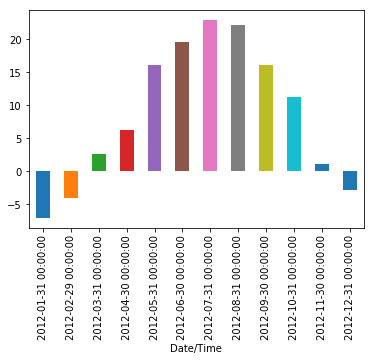

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

tmp.plot(kind='bar')

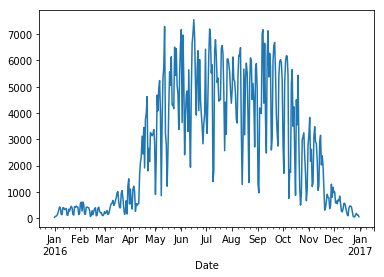

In [61]:
bikes['Berri1'].plot()

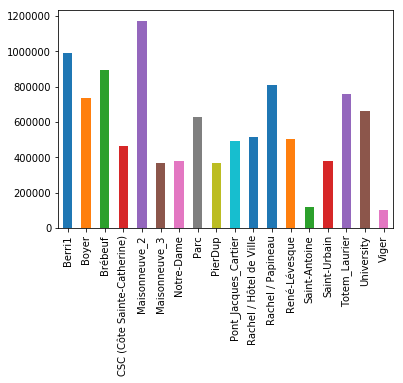

In [62]:
bikes.sum().plot(kind='bar')

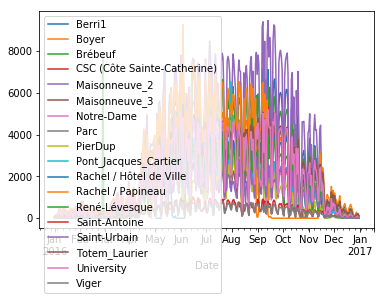

In [63]:
bikes.plot()

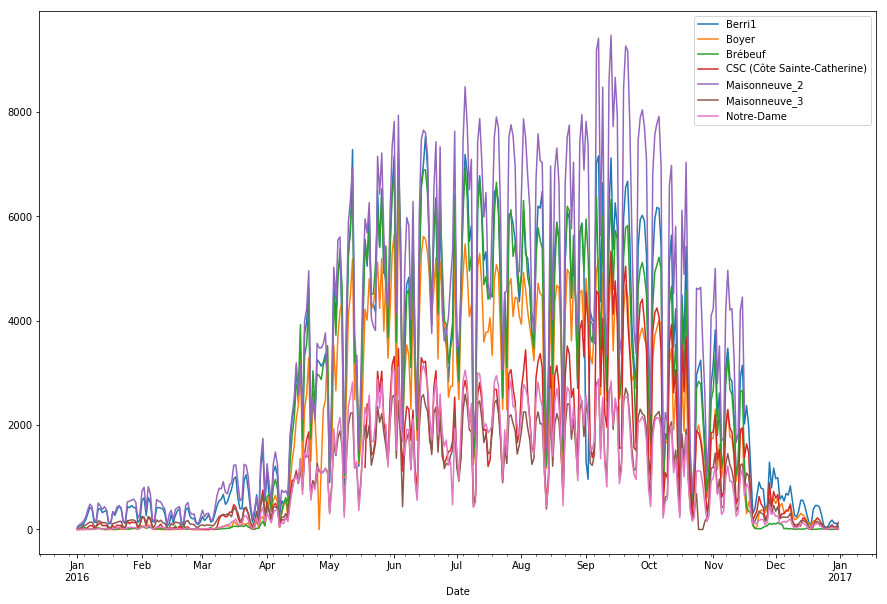

In [64]:
bikes.iloc[:, :7].plot(figsize=(15, 10))

Datos con las llamadas al 311 en la ciudad de Nueva York durante el 2011

Fuente: https://data.cityofnewyork.us/dataset/311-Service-Requests-From-2011/fpz8-jqf4

In [67]:
data = pd.read_csv('https://data.cityofnewyork.us/api/views/qaum-u4fw/rows.csv?accessType=DOWNLOAD')
data

/home/alberto/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (17,29,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,38490123,02/17/2018 02:07:29 PM,02/17/2018 02:21:28 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10002.0,54 RUTGERS STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.711999,-73.989871,"(40.71199877267997, -73.98987125976987)"
1,38490128,02/17/2018 12:29:53 PM,02/17/2018 01:12:34 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10002.0,64 RUTGERS STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.711724,-73.989824,"(40.71172429233714, -73.98982440935572)"
2,37622690,11/06/2017 06:52:36 PM,04/24/2018 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,10002.0,175 ORCHARD STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721699,-73.988409,"(40.72169861759789, -73.98840869697882)"
3,40016666,08/15/2018 10:45:49 PM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,10009.0,109 AVENUE A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.725969,-73.983610,"(40.72596887746701, -73.9836095038645)"
4,40232864,09/09/2018 02:05:55 PM,NaN,TLC,Taxi and Limousine Commission,For Hire Vehicle Complaint,Driver Complaint,Street,10003.0,105 FIRST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.726661,-73.985980,"(40.72666086918666, -73.98597972060985)"
5,37439769,10/16/2017 12:45:27 PM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,10002.0,11 MARKET STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.713511,-73.994564,"(40.7135114536612, -73.99456397510271)"
6,38909507,04/11/2018 09:55:03 PM,07/03/2018 11:10:45 AM,TLC,Taxi and Limousine Commission,For Hire Vehicle Complaint,Driver Complaint,Street,10003.0,21 SECOND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724427,-73.990721,"(40.724427116608155, -73.99072080549794)"
7,38188917,01/12/2018 10:23:14 PM,03/26/2018 11:22:56 AM,TLC,Taxi and Limousine Commission,For Hire Vehicle Complaint,Driver Complaint,Street,10009.0,210 FIRST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.730402,-73.983240,"(40.73040160546891, -73.98324038762311)"
8,38215802,01/15/2018 07:30:14 PM,04/03/2018 09:04:34 AM,TLC,Taxi and Limousine Commission,For Hire Vehicle Complaint,Driver Complaint,Street,10009.0,103 EAST 2 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.723617,-73.987268,"(40.72361708309945, -73.98726832059405)"
9,38222744,01/16/2018 09:33:13 PM,03/26/2018 11:21:51 AM,TLC,Taxi and Limousine Commission,For Hire Vehicle Complaint,Driver Complaint,Street,10009.0,105 EAST 2 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.723595,-73.987214,"(40.72359511904071, -73.98721420885653)"


In [68]:
data['Complaint Type'].unique().size

182

In [69]:
count = data['Complaint Type'].value_counts()
count

Noise - Residential                     28027
HEAT/HOT WATER                          16860
Noise - Commercial                      16526
Noise                                   10985
Noise - Street/Sidewalk                  8586
Illegal Parking                          7821
Street Condition                         5717
UNSANITARY CONDITION                     5396
Water System                             4819
Homeless Person Assistance               4578
Taxi Complaint                           4184
Graffiti                                 4131
For Hire Vehicle Complaint               3875
PAINT/PLASTER                            3410
General Construction/Plumbing            3310
PLUMBING                                 3142
GENERAL                                  2874
Noise - Vehicle                          2872
Broken Muni Meter                        2849
Request Large Bulky Item Collection      2758
Rodent                                   2576
Dirty Conditions                  

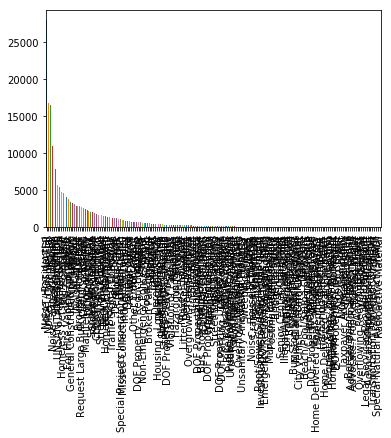

In [70]:
count.plot(kind='bar')

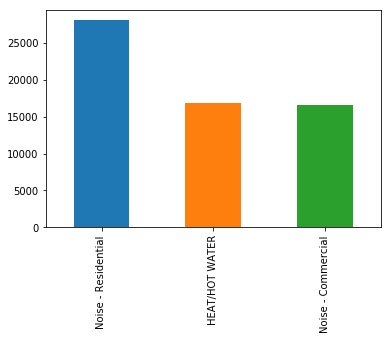

In [71]:
count[count > 15000].plot(kind='bar')

##### Ejercicio weather y nycity

##### Group by: split-apply-combine

Muchas veces las operaciones no las queremos hacer sobre una variable sino agrupandola en función de otra. Pandas implementa esta funcionalidad en los métodos `.groupby()`, `.transform()` y `.aggregate()`.

Más información: https://pandas.pydata.org/pandas-docs/stable/groupby.html

In [7]:
bikes['Month'] = bikes.index.month
bikes['Trimestre'] = pd.cut(bikes['Month'], [1, 3, 6, 9, 12], include_lowest=True)
bikes.groupby('Trimestre')['University'].mean()

Trimestre
(0.999, 3.0]     258.373626
(3.0, 6.0]      2466.109890
(6.0, 9.0]      3293.293478
(9.0, 12.0]     1190.315217
Name: University, dtype: float64

In [10]:
import numpy as np
bikes.groupby('Month').aggregate([np.sum, np.mean])

Berri1                Boyer              Brébeuf               \
          sum         mean     sum         mean     sum         mean   
Month                                                                  
1        8503   274.290323     244     7.870968     473    15.258065   
2        8432   290.758621     348    12.000000     624    21.517241   
3       17294   557.870968    2069    66.741935    1164    37.548387   
4       62759  2091.966667   42450  1415.000000   59473  1982.433333   
5      136001  4387.129032  112103  3616.225806  136906  4416.322581   
6      145972  4865.733333  121958  4065.266667  144407  4813.566667   
7      156673  5053.967742  123951  3998.419355  151517  4887.645161   
8      146558  4727.677419  119706  3861.483871  143398  4625.741935   
9      145296  4843.200000  113692  3789.733333  136479  4549.300000   
10      96285  3105.967742   64263  2073.000000   84387  2722.161290   
11      52637  1754.566667   30053  1001.766667   36713  1223.766667   
12      12185   393.064516    6582   212.322581     669    21.580645   

      CSC (Côte Sainte-Catherine)              Maisonneuve_2               \
                              sum         mean           sum         mean   
Month                                                                       
1                          1955.0    63.064516       10244.0   330.451613   
2                          1618.0    55.793103       11079.0   382.034483   
3                          6450.0   208.064516       21983.0   709.129032   
4                         18297.0   731.880000       67934.0  2264.466667   
5                         30060.0  2147.142857      146900.0  4738.709677   
6                         63753.0  2125.100000      163284.0  5442.800000   
7                         61741.0  1991.645161      183623.0  5923.322581   
8                         77663.0  2505.258065      182923.0  5900.741935   
9                        101796.0  3393.200000      202139.0  6737.966667   
10                        64486.0  2080.193548      128940.0  4159.354839   
11                        32725.0  1090.833333       54293.0  3393.312500   
12                         5362.0   172.967742           0.0          NaN   

          ...     Saint-Antoine             Saint-Urbain               \
          ...               sum        mean          sum         mean   
Month     ...                                                           
1         ...              1084   34.967742         2555    82.419355   
2         ...              1296   44.689655         2573    88.724138   
3         ...              1839   59.322581         8916   287.612903   
4         ...              6955  231.833333        29079   969.300000   
5         ...             16256  524.387097        52932  1707.483871   
6         ...             18441  614.700000        56848  1894.933333   
7         ...             19823  639.451613        52653  1698.483871   
8         ...             17687  570.548387        51068  1647.354839   
9         ...             17765  592.166667        55635  1854.500000   
10        ...             10596  341.806452        39899  1287.064516   
11        ...              6031  201.033333        22592   753.066667   
12        ...              1545   49.838710         3408   109.935484   

      Totem_Laurier              University               Viger              
                sum         mean        sum         mean    sum        mean  
Month                                                                        
1              5817   187.645161       6012   193.935484   1258   40.580645  
2              3803   131.137931       5490   189.310345   1246   42.965517  
3             11238   362.516129      12010   387.419355   1807   58.290323  
4             48890  1629.666667      41917  1397.233333   6105  203.500000  
5             98680  3183.225806      86415  2787.580645  13288  428.645161  
6            110439  3681.300000      96084  3202.

In [11]:
bikes.reset_index().groupby('Month').agg({'Berri1': np.mean, 'Boyer': np.sum})

,Berri1,Boyer
Month,,
1,274.290323,244
2,290.758621,348
3,557.870968,2069
4,2091.966667,42450
5,4387.129032,112103
6,4865.733333,121958
7,5053.967742,123951
8,4727.677419,119706
9,4843.200000,113692


In [77]:

df1 = bikes.groupby('Month').agg({'Berri1': np.mean, 'Boyer': np.sum})
df1 = bikes.groupby('Month').aggregate([np.sum, np.mean])
df1 = bikes.groupby(['Month'])[['Berri1', 'Boyer']].sum()
df1

,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger
Month,,,,,,,,,,,,,,,,,,
1,8503,244,473,1955.0,10244.0,3320,498,4021,157,382,0.0,9797,2990,1084,2555,5817,6012,1258
2,8432,348,624,1618.0,11079.0,3465,673,4709,243,446,0.0,10204,10626,1296,2573,3803,5490,1246
3,17294,2069,1164,6450.0,21983.0,7449,3343,11758,2727,6275,0.0,21402,4718,1839,8916,11238,12010,1807
4,62759,42450,59473,18297.0,67934.0,23192,22121,40767,22980,32446,0.0,66178,27472,6955,29079,48890,41917,6105
5,136001,112103,136906,30060.0,146900.0,48973,55859,80530,60146,68321,25484.0,143116,70334,16256,52932,98680,86415,13288
6,145972,121958,144407,63753.0,163284.0,52130,59490,88281,50039,75331,84579.0,161465,72695,18441,56848,110439,96084,14966
7,156673,123951,151517,61741.0,183623.0,54845,65587,85913,77936,94673,104230.0,160446,81455,19823,52653,112032,101593,16671
8,146558,119706,143398,77663.0,182923.0,55311,63311,86969,67088,83043,100839.0,146520,77760,17687,51068,112876,98018,16807
9,145296,113692,136479,101796.0,202139.0,59408,58368,103029,54288,70662,104830.0,49664,81121,17765,55635,115794,103372,14168


In [ ]:
bikes['Month'] = bikes.index.month

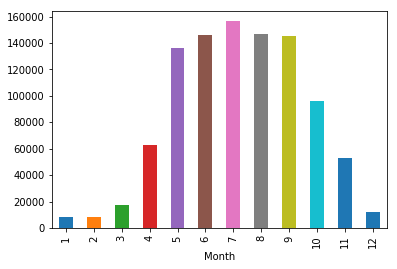

In [78]:
df1['Berri1'].plot(kind='bar');

###### Ejercicio bicis

##### Combinar Pandas y Matplotlib

El método `.plot()` de los `DataFrames` de Pandas es bastante flexible, pero no podemos modificar ningún aspecto del gráfico no contemplado en los parámetros opcionales:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

En ese caso, puesto que los gráficos de Pandas están construídos sobre la librería Matplotlib, podemos utilizar las funciones de bajo nivel de la misma para modificar cualquier aspecto de nuestro gráfico.

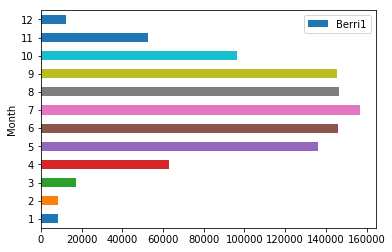

In [79]:
fig, ax = plt.subplots()
df1.plot(kind='barh', y='Berri1', ax=ax)

Text(0, 0.5, 'Mes')

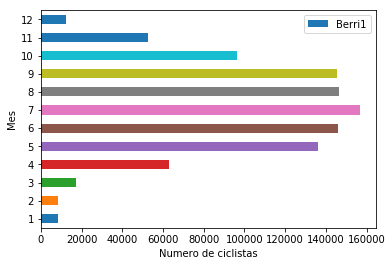

In [80]:
fig, ax = plt.subplots()
df1.plot(kind='barh', y='Berri1', ax=ax)
ax.set_xlabel('Numero de ciclistas')
ax.set_ylabel('Mes')

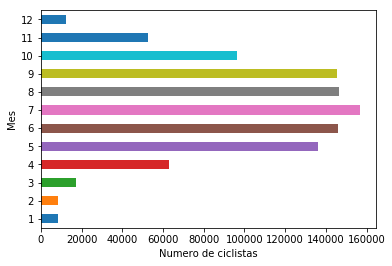

In [81]:
fig, ax = plt.subplots()
df1.plot(kind='barh', y='Berri1', ax=ax)
ax.set_xlabel('Numero de ciclistas')
ax.set_ylabel('Mes')
ax.legend().set_visible(False)

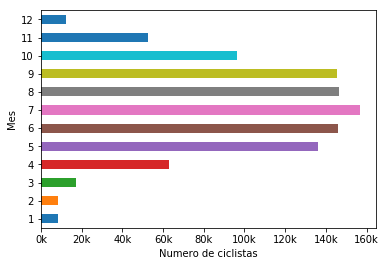

In [82]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()
df1.plot(kind='barh', y='Berri1', ax=ax)
ax.set_xlabel('Numero de ciclistas')
ax.set_ylabel('Mes')

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, y: '{:d}k'.format(int(x/1000))))

ax.legend().set_visible(False)

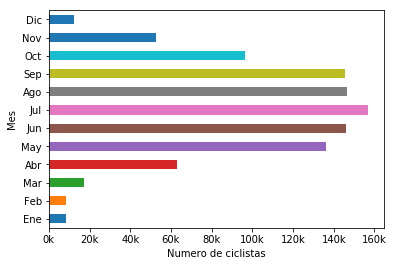

In [83]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()
df1.plot(kind='barh', y='Berri1', ax=ax)
ax.set_xlabel('Numero de ciclistas')
ax.set_ylabel('Mes')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, y: '{:d}k'.format(int(x/1000))))
ax.set_yticklabels(['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
ax.legend().set_visible(False)

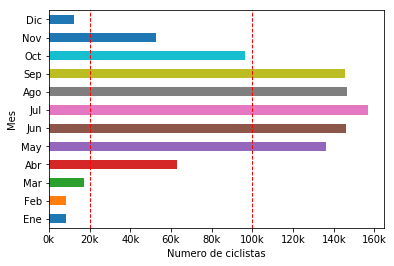

In [84]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()
df1.plot(kind='barh', y='Berri1', ax=ax)
ax.set_xlabel('Numero de ciclistas')
ax.set_ylabel('Mes')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, y: '{:d}k'.format(int(x/1000))))
ax.set_yticklabels(['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
for x in (20000, 100000):
    ax.axvline(x=x, color='r', linestyle='--', linewidth=1)
ax.legend().set_visible(False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb9f0d8d68>,
      dtype=object)

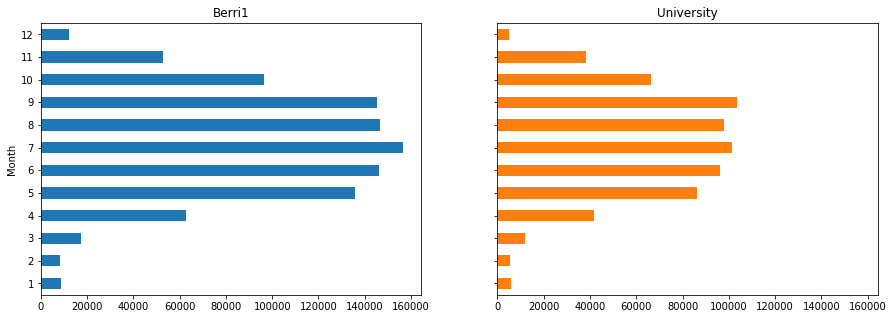

In [85]:
# solo con Pandas
df1[['Berri1', 'University']].plot(kind='barh', 
                                   sharey=True, 
                                   subplots=True, 
                                   legend=False, 
                                   layout=(1,2),
                                   figsize=(15, 5))

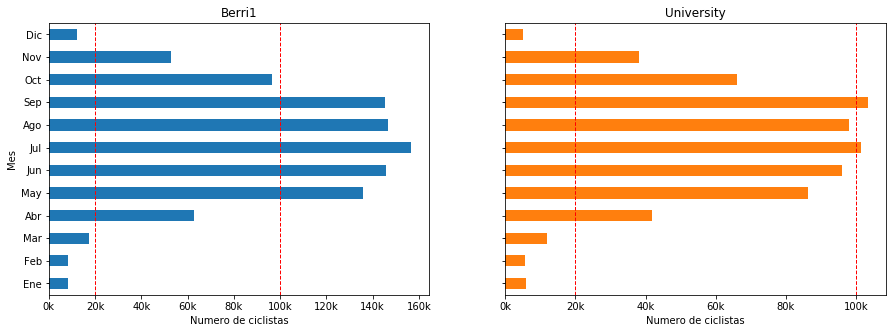

In [86]:
# Pandas + retocar en Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
df1[['Berri1', 'University']].plot(kind='barh',  
                                   subplots=True, 
                                   legend=False, 
                                   ax=axes)
for ax in axes:
    ax.set_xlabel('Numero de ciclistas')
    ax.set_ylabel('Mes')
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, y: '{:d}k'.format(int(x/1000))))
    ax.set_yticklabels(['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
    for x in (20000, 100000):
        ax.axvline(x=x, color='r', linestyle='--', linewidth=1)